In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
import scipy.stats as stats
import random
from sklearn.linear_model import LinearRegression

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
x = stats.uniform.rvs(0, 1, 1000) * 10
y = -30.1415 + (5.5 * x) + stats.norm.rvs(2.4, 7.2, 1000)

df = pd.DataFrame({'bias': np.ones(1000), 'x': x, 'y': y})
df.head()

,bias,x,y
0,1.0,9.135033,35.254843
1,1.0,2.019092,-16.936914
2,1.0,8.644710,19.460332
3,1.0,2.408099,-13.875491
4,1.0,9.390549,15.725038


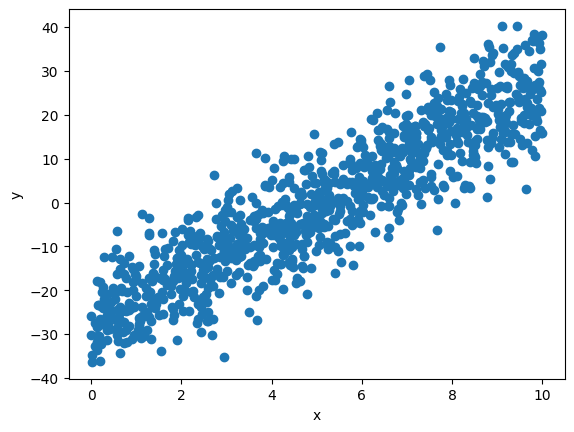

In [3]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# Prepare the data (including the bias term as the first column)
y = df['y'].values.reshape(1, -1)
X = df[['bias', 'x']].values.T

X.shape, y.shape

((2, 1000), (1, 1000))

In [5]:
# Initialize theta (including bias and slope) with any random values between -1 and 1 
# i.e uniform(-1, 1)
theta = stats.uniform.rvs(-1, 1, size=(X.shape[0], 1))  # Includes bias and slope
theta.shape

(2, 1)

In [6]:
theta

array([[-0.0846025 ],
       [-0.64669727]])

In [7]:
# let's define the cost function

def cost_function(theta: np.array, X: np.array, y: np.array, m: int=X.shape[1]):
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    cost = (1./(2*m)) * np.sum(diff**2)
    
    return cost


# let's define a function to get the gradients

def get_gradient(theta: np.array, X: np.array, y: np.array, m: int=X.shape[1]):
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    gradient = (1./m) * np.dot(X, diff.T)
    
    return gradient


In [46]:

def run(n_iterations: int=10000, lr: float=0.001, momentum: float=0.999):
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X.shape[0], 1))
    v = np.zeros_like(theta)  # Initialize velocity vector with zeros
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = cost_function(theta=theta, X=X, y=y)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = get_gradient(theta=theta, X=X, y=y)
        
        # Update the velocity
        v = momentum * v + (1 - momentum) * gradient
        
        # Update theta using the velocity (with momentum)
        theta = theta - (lr * v)
    
    return theta, np.array(costs)

In [50]:
n_iterations = 20000

optimal_theta, costs = run(n_iterations=n_iterations)
optimal_theta

The cost at 0th iteration is 143.86711375623364
Theta: [[-0.87073455 -0.02430832]]
************************************************

The cost at 10th iteration is 143.73587408948993
Theta: [[-0.87067214 -0.02162556]]
************************************************

The cost at 20th iteration is 143.36943516808947
Theta: [[-0.8704984  -0.01410805]]
************************************************

The cost at 30th iteration is 142.77508511084525
Theta: [[-0.87021827 -0.00182947]]
************************************************

The cost at 40th iteration is 141.96307725737722
Theta: [[-0.86983909  0.01512109]]
************************************************

The cost at 50th iteration is 140.9464305538611
Theta: [[-0.8693705   0.03663954]]
************************************************

The cost at 60th iteration is 139.7406958197315
Theta: [[-0.86882439  0.06260732]]
************************************************

The cost at 70th iteration is 138.36369178906943
Theta: [[-0.8682

array([[-27.58107693],
       [  5.4277265 ]])

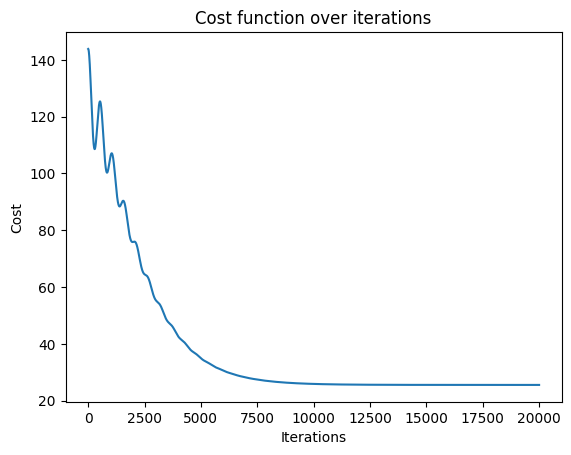

In [51]:
# Plot the cost over iterations
plt.plot(range(n_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

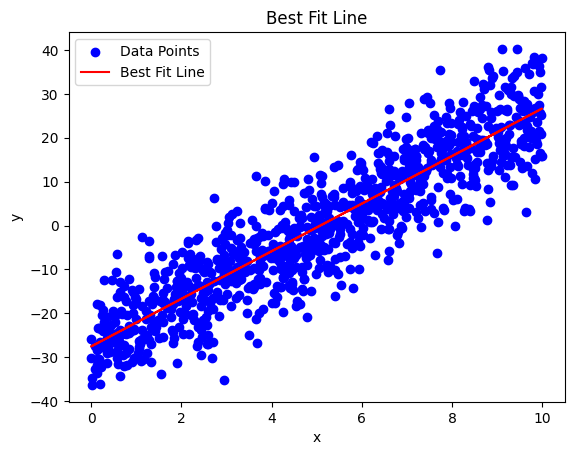

In [52]:
# Compute the predicted y values (best fit line) using the optimal theta
# y_pred = theta_0 + theta_1 * x
y_pred = optimal_theta[0] + optimal_theta[1] * df['x']

# Plot the original data points
plt.scatter(df['x'], df['y'], color='blue', label='Data Points')

# Plot the best fit line
plt.plot(df['x'], y_pred, color='red', label='Best Fit Line')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Line')

# Show the legend
plt.legend()
plt.show()